## Get Data

### Install Package

In [ ]:
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install datasets

In [ ]:
!pip install evaluate

In [ ]:
!pip install rouge_score

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3

In [ ]:
import os
import glob
import tarfile
import pandas as pd
import numpy as np

In [ ]:
import nltk
import evaluate
from datasets import Dataset, DatasetDict
from nltk.tokenize import sent_tokenize
rouge_score = evaluate.load("rouge")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
work_dir = '/content/drive/MyDrive/NLP Bootcamp/project-2_text_summarization' # change to your working directory
os.chdir(work_dir)

### Import Data

In [ ]:
os.listdir(work_dir)

['liputan6_data.tar.gz',
 'dataset',
 'dataset_parquet',
 'Text-Summarization.ipynb']

In [ ]:
# I assume you already downloaded liputan6_data.tar.gz from fajrikoto/id_liputan6 (huggingface dataset)
datasource = tarfile.open('liputan6_data.tar.gz')
datasource.extractall('./dataset') # will create a directory of dataset/liputan6_data
datasource.close()

In [ ]:
import json
import re
import os

def get_article(json_filename_path,tobe_get_key='clean_article'):
    '''Load json file and get article'''
    file = open(json_filename_path,'r')
    article_dict = json.load(file)
    file.close()
    return article_dict[tobe_get_key]

def cleaning_article_sentence(list_sentence):
    '''Cleaning sentences'''
    list_sentence_clean = [' '.join(sent).replace(' .','.').replace(' ,',',').replace('( ','(').replace(' )',')').replace('. ','.').replace('"','') for sent in list_sentence]
    # remove "Liputan6.com" intro template
    list_sentence_clean[0] = list_sentence_clean[0].split(':')[-1].strip()
    # remove "( xxxx )" outro template
    list_sentence_clean[-1] = list_sentence_clean[-1].split('.(')[0].strip()+'.'
    pattern = '\[.*\]'
    list_sentence_clean[-1] = re.sub(pattern,'',list_sentence_clean[-1]).replace(' .','.')
    return list_sentence_clean

def get_data_from_json(json_file):
  with open(json_file, "r", encoding="utf-8") as file:
    data = json.load(file)
    article = cleaning_article_sentence(data['clean_article'])
    article = ' '.join(article)
    article = re.sub(r'\.{2,}', '.', article)
    summary = cleaning_article_sentence(data['clean_summary'])
    summary = ' '.join(summary)
    summary = re.sub(r'\.{2,}', '.', summary)
    return {"article":article,"summary":summary}

In [ ]:
get_data_from_json('dataset/liputan6_data/canonical/train/296458.json')

{'article': 'Tim kuasa hukum Huria Kristen Batak Protestan (HKBP) Pondok Timur Indah, Bekasi, Jawa Barat, mengatakan bahwa kejadian penusukan seharusnya dapat dihindari seandainya pemerintah cepat tanggap.  Para jemaat merasa miris,  ujar Koordinator Tim Advokasi Gereja Huria Kristen Batak Protestan (HKBP) Pondok Indah Timur, Bekasi, Jawa Barat, Sahara Pangaribuan, saat ditemui di Markas Kepolisian Daerah Metro Jaya, Rabu (15/9). Ia menambahkan para jemaat sudah sejak lama merasa diamati dan pernah melaporkannya kepada Komisi Nasional Hak Asasi Manusia untuk diteruskan kepada Presiden Susilo Bambang Yudhoyono terkait pelarangan ibadah sejak sebulan lalu. Sahara mengaku kecewa dengan pihak kepolisian yang menganggap kasus penusukan jemaat HKBP sebagai kriminal murni. Ia mengatakan pihaknya sudah melaporkan masalah ini ke Mabes Polri sejak Agustus lalu sebagai kasus penghinaan terhadap agama. Konflik antara jemaat HKBP dan warga Desa Ciketing, Bekasi Timur, telah terjadi sejak beberapa t

In [ ]:
import timeit
import concurrent.futures
import threading
import pandas as pd
#########################################
# USING ASYNC TO GET DATA IN PARARELISM #
#########################################
def get_dataset(dir):
  '''Get dataset from directory then do cleaning. Return dataframe consists of articles and summaries'''
  filenames_path = list(map(lambda x:dir+'/'+x, os.listdir(dir)))
  start_time = timeit.default_timer()
  semaphore = threading.BoundedSemaphore(8)

  with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
      future_articles = [executor.submit(get_data_from_json, filename) for filename in filenames_path]
      articles = [future.result() for future in concurrent.futures.as_completed(future_articles)]

  df_articles=pd.json_normalize(articles)
  end_time = timeit.default_timer()

  print(f"Execution time: {end_time - start_time:.2f} seconds")
  return df_articles

In [ ]:
# Generate Dataset from Directory of JSONs. Only one time run.
df_train = get_dataset('dataset/liputan6_data/canonical/train') # Execution time: 4204.90 seconds
df_val = get_dataset('dataset/liputan6_data/canonical/dev') # Execution time: 284.85 seconds
df_test = get_dataset('dataset/liputan6_data/canonical/test') # Execution time: 328.75 seconds

Execution time: 4204.90 seconds


In [ ]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.9 MB/s eta 0:00:00


In [ ]:
# Export to Parquet to speed up when re-calling the dataset. Only one time run.
df_train.to_parquet('dataset_parquet/canonical_train.parquet',engine='fastparquet')
df_val.to_parquet('dataset_parquet/canonical_dev.parquet',engine='fastparquet')
df_test.to_parquet('dataset_parquet/canonical_test.parquet',engine='fastparquet')

In [ ]:
# %env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
# %env TORCH_USE_CUDA_DSA=1

env: TORCH_USE_CUDA_DSA=1


## Get Data

In [ ]:
###################################################
# START FROM HERE IF YOU ALREADY HAVE THE PARQUET #
###################################################

# Read parquet dataset
df_train = pd.read_parquet('dataset_parquet/canonical_train.parquet')
df_val = pd.read_parquet('dataset_parquet/canonical_dev.parquet')
df_test = pd.read_parquet('dataset_parquet/canonical_test.parquet')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117278 entries, 0 to 117277
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   article  117278 non-null  object
 1   summary  117278 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  10980 non-null  object
 1   summary  10980 non-null  object
dtypes: object(2)
memory usage: 171.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  10972 non-null  object
 1   summary  10972 non-null  object
dtypes: object(2)
memory usage: 171.6+ KB


In [ ]:
df_train.head(3)

,article,summary
0,Sedikitnya 25 anak tewas saat bus sekolah yang...,Puluhan anak tewas saat bus sekolah yang merek...
1,Ratusan mahasiswa dari berbagai daerah yang te...,Ratusan mahasiswa menggelar unjuk rasa di depa...
2,Polisi kembali menembak mati dua anggota kawan...,Polisi kembali menembak mati dua anggota kawan...


In [ ]:
df_test.head(3)

,article,summary
0,Sekitar 300 preman dari berbagai wilayah rawan...,"Selama bulan Ramadan, ratusan preman di Kota M..."
1,Tiga dari lima orang resmi menjadi tersangka d...,Polisi menetapkan tiga dari lima orang sebagai...
2,Kerusakan parah di sepanjang jalan lintas teng...,Sejumlah kerusakan di sepanjang jalan lintas t...


In [ ]:
df_val.head(3)

,article,summary
0,"Menteri Luar Negeri Alwi Shihab, Rabu (22/11) ...",Dua negara kecil di Pasifik mengusulkan Irianj...
1,Tim Reserse Kepolisian Kota Besar Medan mering...,Dua anggota sindikat pengedar ganja asal Aceh ...
2,Panitia Khusus Rancangan Undang-undang (RUU) O...,Pemerintah dan anggota Panitia Khusus RUU Oton...


In [ ]:
# Due to computational resource limitation, We will just use sampling data from original data
import random
random.seed(101)

train_idx = random.choices(df_train.index,k=35000)
df_train_used = df_train.iloc[train_idx].reset_index(drop=True)

val_idx = random.choices(df_val.index,k=2000)
df_val_used = df_val.iloc[val_idx].reset_index(drop=True)

test_idx = random.choices(df_test.index,k=2000)
df_test_used = df_test.iloc[test_idx].reset_index(drop=True)

### EDA

In [ ]:
# Total Sentence and Word from Train Dataframe (Raw)
df_eda_raw = pd.DataFrame()

df_eda_raw['total_sentence_article'] = df_train['article'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_eda_raw['total_words_article'] = df_train['article'].apply(lambda x:len(nltk.word_tokenize(x)))
df_eda_raw['total_sentence_summary'] = df_train['summary'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_eda_raw['total_words_summary'] = df_train['summary'].apply(lambda x:len(nltk.word_tokenize(x)))

df_eda_raw.describe()

,total_sentence_article,total_words_article,total_sentence_summary,total_words_summary
count,117278.000000,117278.000000,117278.000000,117278.000000
mean,12.640342,220.038933,2.087706,30.822891
std,8.642474,139.551666,0.662978,7.373094
min,1.000000,35.000000,1.000000,1.000000
25%,8.000000,135.000000,2.000000,27.000000
50%,10.000000,181.000000,2.000000,30.000000
75%,15.000000,262.000000,2.000000,34.000000
max,320.000000,7206.000000,11.000000,100.000000


In [ ]:
# Total Sentence and Word from Train Dataframe (Used)
df_eda = pd.DataFrame()

df_eda['total_sentence_article'] = df_train_used['article'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_eda['total_words_article'] = df_train_used['article'].apply(lambda x:len(nltk.word_tokenize(x)))
df_eda['total_sentence_summary'] = df_train_used['summary'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_eda['total_words_summary'] = df_train_used['summary'].apply(lambda x:len(nltk.word_tokenize(x)))

df_eda.describe()

,total_sentence_article,total_words_article,total_sentence_summary,total_words_summary
count,35000.000000,35000.000000,35000.000000,35000.000000
mean,12.675486,220.661200,2.085914,30.824857
std,8.967807,142.267167,0.662530,7.359093
min,1.000000,41.000000,1.000000,2.000000
25%,8.000000,135.000000,2.000000,27.000000
50%,10.000000,182.000000,2.000000,30.000000
75%,15.000000,261.000000,2.000000,34.000000
max,307.000000,3438.000000,11.000000,98.000000


In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-25-222f5fd5c04b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


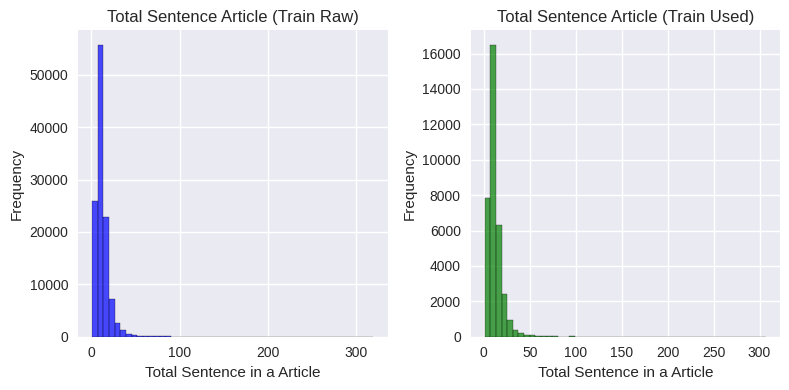

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first histogram
ax1.hist(df_eda_raw['total_sentence_article'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Total Sentence Article (Train Raw)')
ax1.set_xlabel('Total Sentence in a Article')
ax1.set_ylabel('Frequency')

# Plot the second histogram
ax2.hist(df_eda['total_sentence_article'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Total Sentence Article (Train Used)')
ax2.set_xlabel('Total Sentence in a Article')
ax2.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

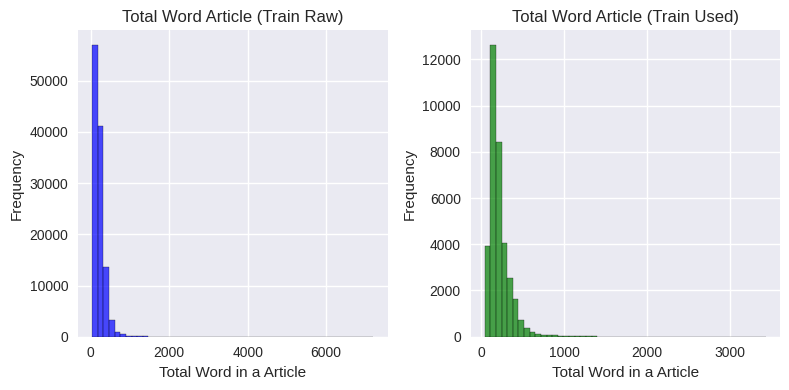

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first histogram
ax1.hist(df_eda_raw['total_words_article'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Total Word Article (Train Raw)')
ax1.set_xlabel('Total Word in a Article')
ax1.set_ylabel('Frequency')

# Plot the second histogram
ax2.hist(df_eda['total_words_article'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Total Word Article (Train Used)')
ax2.set_xlabel('Total Word in a Article')
ax2.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

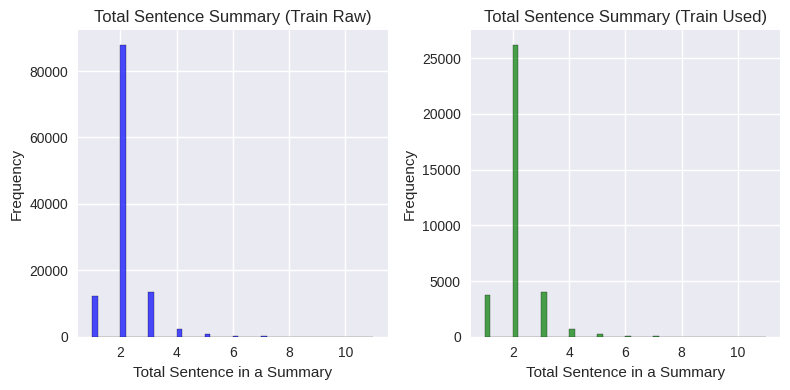

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first histogram
ax1.hist(df_eda_raw['total_sentence_summary'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Total Sentence Summary (Train Raw)')
ax1.set_xlabel('Total Sentence in a Summary')
ax1.set_ylabel('Frequency')

# Plot the second histogram
ax2.hist(df_eda['total_sentence_summary'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Total Sentence Summary (Train Used)')
ax2.set_xlabel('Total Sentence in a Summary')
ax2.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

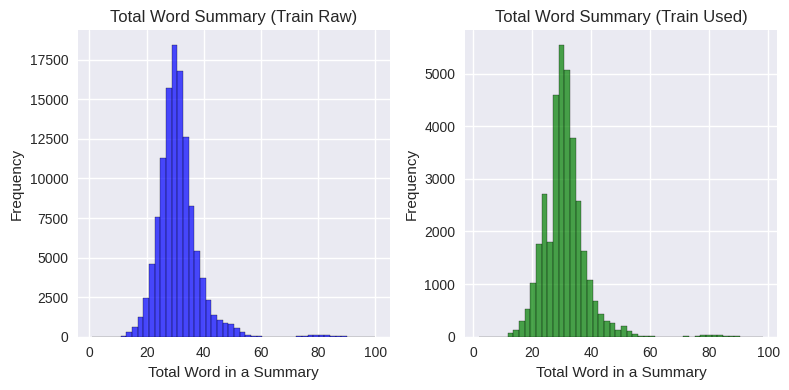

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first histogram
ax1.hist(df_eda_raw['total_words_summary'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Total Word Summary (Train Raw)')
ax1.set_xlabel('Total Word in a Summary')
ax1.set_ylabel('Frequency')

# Plot the second histogram
ax2.hist(df_eda['total_words_summary'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Total Word Summary (Train Used)')
ax2.set_xlabel('Total Word in a Summary')
ax2.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

## Data Preparation

In [ ]:
from datasets import Dataset, DatasetDict
dataset_train = Dataset.from_pandas(df_train_used)
dataset_val = Dataset.from_pandas(df_val_used)
dataset_test = Dataset.from_pandas(df_test_used)

In [ ]:
datasets = DatasetDict({
    'train': dataset_train,
    'validation': dataset_val,
    'test': dataset_test
})

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['article', 'summary'],
        num_rows: 35000
    })
    validation: Dataset({
        features: ['article', 'summary'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['article', 'summary'],
        num_rows: 2000
    })
})

## Fine Tuning: indolem/indobert-base-uncased

In [ ]:
from transformers import BertTokenizer, BertModel, EncoderDecoderModel, TrainingArguments, Trainer, DataCollatorForSeq2Seq, EarlyStoppingCallback
import evaluate

In [ ]:
model_checkpoint = 'indolem/indobert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_checkpoint)

model = EncoderDecoderModel.from_encoder_decoder_pretrained(encoder_pretrained_model_name_or_path=model_checkpoint,
                                                            decoder_pretrained_model_name_or_path=model_checkpoint)

In [ ]:
max_input_length = 512
max_target_length = 128

def tokenize_function(text):
    model_inputs = tokenizer(text['article'], max_length=max_input_length, truncation=True,)
    labels = tokenizer(text['summary'], max_length=max_target_length, truncation=True)
    return {
        'input_ids': model_inputs['input_ids'],
        'attention_mask': model_inputs['attention_mask'],
        'labels': labels["input_ids"],
    }

tokenized_datasets = datasets.map(tokenize_function,batched=True, num_proc=4)

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=4):   0%|          | 0/35000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/2000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.encoder.vocab_size

model.config.encoder.max_length = 512
model.config.decoder.max_length = 128
model.config.decoder.min_length = 12

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    output_dir=f"{model_name}-checkpoint",
    eval_strategy="epoch",
    learning_rate=2e-5,
    gradient_accumulation_steps=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    warmup_steps=5,
    weight_decay=0.01,
    save_strategy='epoch',
    load_best_model_at_end = True,
)


In [ ]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    data_collator=data_collator,
    tokenizer=tokenizer,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

In [ ]:
trainer.train()

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (0) is identical to the `bos_token_id` (0), `eos_token_id` (None), or the `sep_token_id` (None), and your input is not padded.
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:643: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Epoch,Training Loss,Validation Loss
1,3.284600,3.230221
2,2.720900,3.029064
3,2.208300,2.800345
4,1.822800,2.696049
5,1.561100,2.680530
6,1.365700,2.701562
7,1.210600,2.723278


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True}
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag i

In [ ]:
os.getcwd()

'/content/drive/MyDrive/NLP Bootcamp/project-2_text_summarization'

In [ ]:
trainer.train("./indobert-base-uncased-checkpoint/checkpoint-30625") # resumming training from checkpoint

You are resuming training from a checkpoint trained with 4.41.2 of Transformers but your current version is 4.42.4. This is not recommended and could yield to errors or unwanted behaviors.
There were missing keys in the checkpoint model loaded: ['decoder.cls.predictions.decoder.weight', 'decoder.cls.predictions.decoder.bias'].
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (0) is identical to the `bos_token_id` (0), `eos_token_id` (None), or the `sep_token_id` (None), and your input is not padded.
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:642: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. Yo

Epoch,Training Loss,Validation Loss
8,1.135000,2.737649


/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:642: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
There were missing keys in the checkpoint model loaded: ['decoder.cls.predictions.decoder.weight', 'decoder.cls.predictions.decoder.bias'].


TrainOutput(global_step=35000, training_loss=0.14352016078404017, metrics={'train_runtime': 4071.6887, 'train_samples_per_second': 68.768, 'train_steps_per_second': 8.596, 'total_flos': 1.4259330671863622e+17, 'train_loss': 0.14352016078404017, 'epoch': 8.0})

In [ ]:
trainer.save_model("./fine_tuned_indobert-base-uncased")

In [ ]:
from transformers import AutoModelForSeq2SeqLM,AutoModel,EncoderDecoderModel,AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("./fine_tuned_indobert-base-uncased")
inference_model = EncoderDecoderModel.from_pretrained("./fine_tuned_indobert-base-uncased")

In [ ]:
trainer.evaluate(tokenized_datasets['test'])

/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:642: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


{'eval_loss': 2.411294937133789,
 'eval_runtime': 61.2171,
 'eval_samples_per_second': 32.671,
 'eval_steps_per_second': 4.084,
 'epoch': 8.0}

In [ ]:
df_test_used

,article,summary
0,Terungkapnya jaringan pencurian kendaraan berm...,Petugas Polresta Bukit Tinggi meringkus komplo...
1,Permintaan pemerintah agar Sidang Paripurna DP...,Badan Musyawarah DPR berharap pelaksanaan Sida...
2,Puluhan mahasiswa yang tergabung dalam Jaringa...,Presiden Megawati Sukarnoputri diminta menguta...
3,Badan Penyehatan Perbankan Nasional tetap mela...,Badan Penyehatan Perbankan Nasional tetap memp...
4,Pemerintah terus berupaya memprakarsai islah n...,Pemerintah terus berupaya memprakarsai islah n...
...,...,...
1995,Tak ada yang penting dari kunjungan Presiden M...,Kedatangan Presiden Megawati ke Aceh tak memil...
1996,Praktik percaloan dan penipuan oleh perusahaan...,Para calon penumpang mesti membeli tiket secar...
1997,Terapi analisa perilaku terapan (apllied behav...,Penderita autisme harus mendapatkan terapi unt...
1998,Ketua Front Pembela Islam Habib Rizique Shihab...,Front Pembela Islam menyatakan tak mampu mence...


In [ ]:
import time
def inferencing_model(row):
  st = time.time()
  input_text = row['article']
  inputs = tokenizer.encode(input_text,padding="max_length", truncation=True, max_length=512, return_tensors="pt")
  output = inference_model.to("cuda").generate(inputs.to("cuda"))
  summary_text = tokenizer.decode(output[0], skip_special_tokens=True)
  rt = time.time() - st
  row['summary_ft_indobert'] = summary_text
  row['rt_ft_indobert_seconds'] = rt
  return row

In [ ]:
df_test_used_inf = df_test_used.copy()

In [ ]:
df_test_used_inf = df_test_used_inf.apply(inferencing_model,axis=1)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control

In [ ]:
df_test_used_inf.head()

,article,summary,summary_ft_indobert,rt_ft_indobert_seconds
0,Terungkapnya jaringan pencurian kendaraan berm...,Petugas Polresta Bukit Tinggi meringkus komplo...,polisi berhasil membekuk dua tersangka pencuri...,0.335815
1,Permintaan pemerintah agar Sidang Paripurna DP...,Badan Musyawarah DPR berharap pelaksanaan Sida...,sidang paripurna dpr telah menyepakati jadwal ...,0.333158
2,Puluhan mahasiswa yang tergabung dalam Jaringa...,Presiden Megawati Sukarnoputri diminta menguta...,"puluhan mahasiswa makassar, sulsel, mendesak p...",0.323796
3,Badan Penyehatan Perbankan Nasional tetap mela...,Badan Penyehatan Perbankan Nasional tetap memp...,rencana perpanjangan obligasi daur ulang bank ...,0.317794
4,Pemerintah terus berupaya memprakarsai islah n...,Pemerintah terus berupaya memprakarsai islah n...,pemerintah terus berupaya memprakarsai islah n...,0.316813


In [ ]:
import evaluate
rouge = evaluate.load("rouge")

def evaluate_rouge(row):
  results = rouge.compute(predictions=[row['summary_ft_indobert']], references=[row['summary']])
  row['rouge1'] = results['rouge1']
  row['rouge2'] = results['rouge2']
  row['rougeL'] = results['rougeL']
  row['rougeLsum'] = results['rougeLsum']
  return row


In [ ]:
df_test_used_inf = df_test_used_inf.apply(evaluate_rouge,axis=1)

In [ ]:
df_test_used_inf.head()

,article,summary,summary_ft_indobert,rt_ft_indobert_seconds,rouge1,rouge2,rougeL,rougeLsum
0,Terungkapnya jaringan pencurian kendaraan berm...,Petugas Polresta Bukit Tinggi meringkus komplo...,polisi berhasil membekuk dua tersangka pencuri...,0.335815,0.243902,0.153846,0.195122,0.195122
1,Permintaan pemerintah agar Sidang Paripurna DP...,Badan Musyawarah DPR berharap pelaksanaan Sida...,sidang paripurna dpr telah menyepakati jadwal ...,0.333158,0.400000,0.157895,0.250000,0.250000
2,Puluhan mahasiswa yang tergabung dalam Jaringa...,Presiden Megawati Sukarnoputri diminta menguta...,"puluhan mahasiswa makassar, sulsel, mendesak p...",0.323796,0.500000,0.333333,0.375000,0.375000
3,Badan Penyehatan Perbankan Nasional tetap mela...,Badan Penyehatan Perbankan Nasional tetap memp...,rencana perpanjangan obligasi daur ulang bank ...,0.317794,0.208333,0.086957,0.166667,0.166667
4,Pemerintah terus berupaya memprakarsai islah n...,Pemerintah terus berupaya memprakarsai islah n...,pemerintah terus berupaya memprakarsai islah n...,0.316813,0.457143,0.363636,0.457143,0.457143


In [ ]:
import random
n = random.randint(1,len(df_test_used_inf)-1)
{'article':df_test_used_inf.loc[n]['article'],
'summary':df_test_used_inf.loc[n]['summary'],
'summary_ft_indobert':df_test_used_inf.loc[n]['summary_ft_indobert'],
'rt_ft_indobert_seconds':df_test_used_inf.loc[n]['rt_ft_indobert_seconds'],
'rouge1':df_test_used_inf.loc[n]['rouge1'],
'rouge2':df_test_used_inf.loc[n]['rouge2'],
'rougeL':df_test_used_inf.loc[n]['rougeL'],
'rougeLsum':df_test_used_inf.loc[n]['rougeLsum']}

{'article': 'Majelis Ulama Indonesia mendesak pemerintah membekukan sementara hubungan diplomatik dengan Amerika Serikat. Pernyataan itu disampaikan Sekretaris Umum MUI Dien Syamsudin yang membacakan sikap Forum Ukhuwah Islamiah, Senin (8/10) di Masjid Istiqlal, Jakarta. Dien mengatakan tanggapan terhadap serangan AS Ahad (7/10) silam itu ditujukan kepada Perserikatan Bangsa Bangsa, pemerintah Indonesia, dan seluruh umat Islam di dunia. Forum mendesak PBB untuk menghentikan serangan itu. MUI juga menilai AS harus dikenakan sanksi karena dianggap melanggar hukum internasional dan Hak Asasi Manusia. Pada kesempatan yang sama, Panglima Perang Laskar Jihad Jafar Umar Thalib menyatakan telah menyiapkan 10 ribu pasukan untuk dikirim ke Afghanistan. Hingga saat ini, kelompoknya menyiapkan dan melakukan rekrutmen bagi mereka yang hendak dikirim ke Afghanistan. Tapi Jafar tidak menyebutkan waktu pasukan tersebut akan diberangkatkan.',
 'summary': 'Pemerintah Indonesia didesak memutuskan hubunga

In [ ]:
import random
n = random.randint(1,len(df_test_used_inf)-1)
{'article':df_test_used_inf.loc[n]['article'],
'summary':df_test_used_inf.loc[n]['summary'],
'summary_ft_indobert':df_test_used_inf.loc[n]['summary_ft_indobert'],
'rt_ft_indobert_seconds':df_test_used_inf.loc[n]['rt_ft_indobert_seconds'],
'rouge1':df_test_used_inf.loc[n]['rouge1'],
'rouge2':df_test_used_inf.loc[n]['rouge2'],
'rougeL':df_test_used_inf.loc[n]['rougeL'],
'rougeLsum':df_test_used_inf.loc[n]['rougeLsum']}

{'article': 'Kepala Pusat Laboratorium Forensik Polri Brigadir Jenderal Polisi M Hamim Suryaamidjaya mengungkapkan bahan peledak pada Plaza Atrium Senen, Jakarta Pusat, menggunakan trinitrotulene dengan tiga detonator yang memiliki daya ledak tinggi.  Ledakan itu adalah bom mobil yang ditaruh di dalamnya. Tujuannya untuk meneror masyarakat,  kata dia kepada Indiarto Priadi di Studio SCTV, Senin (24/9) petang. Menurut Hamim, jenis bom ini terakhir digunakan pada ledakan menjelang malam Natal 2000. Petunjuk lain yang diperoleh adalah mobil pembawa bom itu bekas milik Tengku Ismuhadi, terpidana pengeboman Gedung Bursa Efek Jakarta. Hal yang menarik yaitu timer bom dari jam dinding tersimpan di jok belakang mobil. Jam berukuran besar itu dirangkaikan dengan kabel ke aki yang dihubungkan ke bagasi dan bagian bawah jok depan. Dia memperkirakan bom rangkaian itu dibuat dengan biaya yang relatif murah.  Saya bertangung jawab pada tempat kejadian dan analisa bahan peledak. Saya tak punya kewena

In [ ]:
import random
n = random.randint(1,len(df_test_used_inf)-1)
{'article':df_test_used_inf.loc[n]['article'],
'summary':df_test_used_inf.loc[n]['summary'],
'summary_ft_indobert':df_test_used_inf.loc[n]['summary_ft_indobert'],
'rt_ft_indobert_seconds':df_test_used_inf.loc[n]['rt_ft_indobert_seconds'],
'rouge1':df_test_used_inf.loc[n]['rouge1'],
'rouge2':df_test_used_inf.loc[n]['rouge2'],
'rougeL':df_test_used_inf.loc[n]['rougeL'],
'rougeLsum':df_test_used_inf.loc[n]['rougeLsum']}

{'article': 'Pemerintah belum menemukan titik temu dalam menentukan jumlah anggaran untuk Kredit Perumahan Rakyat (KPR). Pasalnya, usulan antara Menteri Keuangan Boediono dan Menteri Pemukiman Prasarana Wilayah Soenarno masih berseberangan. Karena itu, persoalan realisasi anggaran KPR tahun 2001 menjadi kabur dan berlarut-larut. Demikian Direktur Jenderal Anggaran dan Keuangan Darmin Nasution, di sela-sela dengar pendapat antara Departemen Keuangan dan Komisi IX DPR, di Jakarta, Senin (22/10). Menurut Darmin, Menkeu Boediono menginginkan jumlah subsidi KPR diperkecil karena anggaran negara terbatas. Sebaliknya Seonarno mengajukan anggaran untuk rumah sederhana dan rumah sangat sederhana seluruhnya dapat direalisasikan pemerintah. Sayangnya, ketika SCTV meminta konfirmasi, Menkeu Boediono enggan menjawab pertanyaan tersebut. Sebelumnya, Menkimpraswil Soenarno pernah menjanjikan subsidi KPR senilai Rp 961 miliar untuk membangun 80 ribu RS dan RSS. Soenarno merencanakan akan mengucurkan d

In [ ]:
rt_mean = df_test_used_inf['rt_ft_indobert_seconds'].mean()
rt_std = df_test_used_inf['rt_ft_indobert_seconds'].std()
rouge1_mean = df_test_used_inf['rouge1'].mean()
rouge1_std = df_test_used_inf['rouge1'].std()
rouge2_mean = df_test_used_inf['rouge2'].mean()
rouge2_std = df_test_used_inf['rouge2'].std()
rougeL_mean =  df_test_used_inf['rougeL'].mean()
rougeL_std	 = df_test_used_inf['rougeL'].std()
rougeLsum_mean = df_test_used_inf['rougeLsum'].mean()
rougeLsum_std = df_test_used_inf['rougeLsum'].std()

evaluation_str = f"""
[Model Evaluation: Fine Tuned Pre-Trained Model Indobert-Base-Uncased]
Runtime : {rt_mean:.2f}s (+/- {rt_std:.2f}s)
Rouge1 : {rouge1_mean:.2f} (+/- {rouge1_std:.2f})
Rouge2 : {rouge2_mean:.2f} (+/- {rouge2_std:.2f})
RougeL : {rougeL_mean:.2f} (+/- {rougeL_std:.2f})
RougeLsum : {rougeLsum_mean:.2f} (+/- {rougeLsum_std:.2f})
"""
print(evaluation_str)


[Model Evaluation: Fine Tuned Pre-Trained Model Indobert-Base-Uncased]
Runtime : 0.31s (+/- 0.01s)
Rouge1 : 0.33 (+/- 0.14)
Rouge2 : 0.15 (+/- 0.12)
RougeL : 0.28 (+/- 0.13)
RougeLsum : 0.28 (+/- 0.13)



## Future Works

According to the performance evaluation of Fine Tuned Pre-Trained Model Indobert-base-uncased, it shown the
- Rouge1 : 0.33 (+/- 0.14)
- Rouge2 : 0.15 (+/- 0.12)
- RougeL : 0.28 (+/- 0.13)
- RougeLsum : 0.28 (+/- 0.13) <br>

with average inferencing runtime is 1.06s (+/- 0.15s). This result relatively low for summarization compare with original Pre-Trained model which has Rouge1/Rouge2/RougeL is 69.93/62.86/69.21 [source](https://huggingface.co/indolem/indobert-base-uncased). This might caused by number our training data that only 35,000. So, I recommended to increase the number of data training.
<br><br>
Besides, we could also explore with others Pre-Trained model like
- cahya/bert2bert-indonesian-summarization
- cahya/t5-base-indonesian-summarization-cased
- cahya/bert2gpt-indonesian-summarization
- more...

## Fine Tuning: cahya/bert2bert-indonesian-summarization [ON PROGRESS]

In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

model_checkpoint = "cahya/bert2bert-indonesian-summarization"
tokenizer = BertTokenizer.from_pretrained("cahya/bert2bert-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token

# model = EncoderDecoderModel.from_pretrained("cahya/bert2bert-indonesian-summarization")
from transformers import AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [ ]:
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.encoder.vocab_size

model.config.encoder.max_length = 512
model.config.decoder.max_length = 128
model.config.decoder.min_length = 13
# model.config.length_penalty = 2.0
model.config.early_stopping = True

In [ ]:
# Try Inferencing Model (Before Fine tuning)
inputs = tokenizer.encode(datasets['train'][42]['article'],return_tensors='pt')
output = model.generate(inputs)
summary_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(summary_text)

ribuan kades dan perangkat desa di nganjuk berunjuk rasa ke kantor bupati, menuntut pemberian gaji pokok sebesar upah minimum kabupaten. mereka mengancam akan menduduki pendopo kabupaten jika bupati tidak memenuhi tuntutan mereka.


In [ ]:
max_input_length = 512
max_target_length = 128

def tokenize_function(text):
    model_inputs = tokenizer(
        text['article'],
        max_length=max_input_length,
        truncation=True,
    )

    labels = tokenizer(
        text['summary'], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = datasets.map(tokenize_function, batched=True, num_proc=4)

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=4):   0%|          | 0/35000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/2000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import nltk
import numpy as np
import evaluate
from nltk.tokenize import sent_tokenize
rouge_score = evaluate.load("rouge")
nltk.download('punkt')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    print("decoded_preds",decoded_preds)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    print("decoded_labels",decoded_labels)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    return {k: round(v, 4) for k, v in result.items()}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
model_checkpoint

'cahya/bert2bert-indonesian-summarization'

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Seq2SeqTrainingArguments

# logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-checkpoint",
    eval_strategy="epoch",
    learning_rate=2e-5,
    gradient_accumulation_steps=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    warmup_steps=5,
    weight_decay=0.01,
    save_strategy='epoch',
    load_best_model_at_end = True,
    # save_total_limit=3,                      # Limit the maximum number of checkpoint saved during training
    # predict_with_generate=True,              # To indicate that we should generate summaries during evaluation for computing ROUGE scores
    # logging_steps=logging_steps,             # Show the training loss with every epoch
)


In [ ]:
from transformers import Trainer, Seq2SeqTrainer,EarlyStoppingCallback

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    # compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

In [ ]:
# try the trainer, to make sure we do not face error during training
trainer.evaluate(tokenized_datasets['test']) # before training

/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:643: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


{'eval_loss': 2.8227956295013428,
 'eval_runtime': 63.3023,
 'eval_samples_per_second': 31.594,
 'eval_steps_per_second': 3.949}

In [ ]:
trainer.train() # do the training

/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:643: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Epoch,Training Loss,Validation Loss
1,0.755600,2.443204


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 40, 'min_length': 20, 'early_stopping': True, 'num_beams': 10, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:643: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Epoch,Training Loss,Validation Loss
1,0.755600,2.443204
2,0.557700,2.536770


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 40, 'min_length': 20, 'early_stopping': True, 'num_beams': 10, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:643: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


In [ ]:
trainer.save_model("./fine_tuned_bert2bert")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 40, 'min_length': 20, 'early_stopping': True, 'num_beams': 10, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}


In [ ]:
bert2bert_loaded = AutoModelForSeq2SeqLM.from_pretrained("./fine_tuned_bert2bert")


In [ ]:
inputs = tokenizer.encode(datasets['train'][42]['articles'],return_tensors='pt')
output = bert2bert_loaded.generate(inputs)
summary_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(summary_text)

ketiga warga australia ini mengaku bersalah dan menyampaikan rasa penyesalan yang mendalam. selain itu, mereka juga memohon kepada majelis hakim untuk tidak memvonis hukuman mati bagi terpidana mati.


In [ ]:
import time
def inference_summarization(row):
  st = time.time()
  text = row['articles']
  inputs = tokenizer.encode(text,return_tensors='pt',max_length=512, truncation=True)
  output = bert2bert_loaded.generate(inputs)
  summary_text = tokenizer.decode(output[0], skip_special_tokens=True)
  row['summary_ft_cahya-bert2bert'] = summary_text
  rt = time.time() - st
  row['rt_ft_cahya-bert2bert_seconds'] = rt
  return row

In [ ]:
df_inference_test = df_test_used.copy()

In [ ]:
df_inference_test = df_inference_test.apply(inference_summarization,axis=1)

In [ ]:
df_inference_test.head(3)

In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

model_checkpoint = "cahya/bert2bert-indonesian-summarization"
tokenizer = BertTokenizer.from_pretrained("cahya/bert2bert-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token


from transformers import AutoModelForSeq2SeqLM
inf_model = AutoModelForSeq2SeqLM.from_pretrained("./fine_tuned_bert2bert")

----------

## Fine Tuning: cahya/t5-base-indonesian-summarization-cased [ON PROGRESS]

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['articles', 'summary_ref'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['articles', 'summary_ref'],
        num_rows: 500
    })
    test: Dataset({
        features: ['articles', 'summary_ref'],
        num_rows: 500
    })
})

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "cahya/t5-base-indonesian-summarization-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/657 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/793k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
datasets['train'][0]

{'articles': 'Jenazah Inspektur Satu Polisi Sugeng dimakamkan di kampung halamannya Desa Mayong, Kecamatan Bagor, Kabupaten Nganjuk, Jawa Timur, Rabu (27/4) siang. Sugeng bunuh diri setelah menembak Ajun Komisaris Polisi Ibrahim Gani, Kepala Satuan Samapta Kepolisian Resor Jombang, Jatim. Sebelum dikuburkan, jenazah lelaki berusia 41 tahun ini sempat diotopsi di ruang jenazah Rumah Sakit Umum Daerah Jombang. Jasad ayah beranak dua ini kemudian disemayamkan di rumah duka di Perumahan Priyo Jombang Indah selama 30 menit. Setibanya di rumah duka, Endang Purwadani, istri almarhum tampak shock dan tak kuasa menahan tangis. Sementara kondisi AKP Ibrahim Gani yang mengalami luka tembak di bagian dada makin kritis. Ibrahim yang sempat dirawat di Rumah Sakit Umum Daerah Jombang langsung dirujuk ke RS Bhayangkara. Kepala Polres Jombang Ajun Komisaris Besar Polisi Dwi Sigit menjelaskan, insiden diduga karena Sugeng yang sudah satu bulan dinonaktifkan karena sakit-sakitan ini stres. Pada saat keja

In [ ]:
inputs = tokenizer(datasets['train'][0]['summary_ref'])
print(inputs)
inputs = tokenizer.convert_ids_to_tokens(inputs.input_ids)
print(inputs)

{'input_ids': [3776, 16941, 641, 10365, 14, 7373, 2062, 14, 788, 379, 1405, 1729, 884, 9102, 157, 1447, 37, 4431, 10365, 30, 1623, 3003, 465, 14312, 591, 13, 15342, 3, 9032, 14, 102, 1630, 11560, 140, 659, 3180, 9102, 157, 1447, 163, 20, 3, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['▁Anggota', '▁DPRD', '▁Kota', '▁Makassar', ',', '▁Sul', 'sel', ',', '▁dianggap', '▁tak', '▁serius', '▁mengatasi', '▁perubahan', '▁tra', 'y', 'ek', '▁dari', '▁Mal', '▁Makassar', '▁ke', '▁Perumahan', '▁Bumi', '▁T', 'amalan', 're', 'a', '▁Permai', '.', '▁Padahal', ',', '▁dua', '▁so', 'pir', '▁sudah', '▁jadi', '▁korban', '▁tra', 'y', 'ek', '▁baru', '▁ini', '.', '</s>']


In [ ]:
max_input_length = 512
max_target_length = 128

def tokenize_function(text):
    model_inputs = tokenizer(
        text['articles'],
        max_length=max_input_length,
        truncation=True,
    )

    labels = tokenizer(
        text['summary_ref'], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = datasets.map(tokenize_function, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['articles', 'summary_ref', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['articles', 'summary_ref', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
    test: Dataset({
        features: ['articles', 'summary_ref', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
})

In [ ]:
tokenized_datasets['train'] = tokenized_datasets['train'].remove_columns(datasets['train'].column_names)
tokenized_datasets['validation'] = tokenized_datasets['validation'].remove_columns(datasets['validation'].column_names)
tokenized_datasets['test'] = tokenized_datasets['test'].remove_columns(datasets['test'].column_names)

tokenized_datasets.column_names

{'train': ['input_ids', 'attention_mask', 'labels'],
 'validation': ['input_ids', 'attention_mask', 'labels'],
 'test': ['input_ids', 'attention_mask', 'labels']}

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 500
    })
})

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import numpy as np
from nltk.tokenize import sent_tokenize
import evaluate
rouge_score = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
model_checkpoint

'cahya/t5-base-indonesian-summarization-cased'

In [ ]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)

{'input_ids': tensor([[ 18832, 140165,    563,  45698,    715,  39430,  34878,    266,   2179,
         104224,    301, 158477,    502,    301,    259,  71379,    382,  26409,
            647,  30945,   1797,   2836,    261,  37988,  53529,   8054,    723,
            261,    412,  24595, 178687,   6092,    261,  17965,  39055,    261,
          22883,    273,  41242,    275,  11991,    259, 131887,    260,   2179,
         104224,    330,  79123,   5695,    259,  16496,    692, 167076,    298,
          20735,  25734,  37085,  34878,    266,  41344,  21575,    266,    261,
            412,  87646,  39430,    321,   4111,  52714,   1589, 148472,    321,
          13712,    723,   2851,  49522,    261,   1480,   8770,    260,  73037,
          13408, 118432,    502,    261,   8391, 140165,    259,  37226,    693,
          15568,   5420,   4481,    854,    259,  51200,    301,    268,   1332,
            522,    301,    259,  39003,   8391, 140165,    259,  28988,  66933,
            27

In [ ]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 5

logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned",
    evaluation_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=3,                      # Limit the maximum number of checkpoint saved during training
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,              # To indicate that we should generate summaries during evaluation for computing ROUGE scores
    logging_steps=logging_steps,             # Show the training loss with every epoch
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model("./fine_tuned_mT5_IndoSum")

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

## Fine Tuning: cahya/bert2gpt-indonesian-summarization [ON PROGRESS]

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from datasets import Dataset, DatasetDict
from transformers import BertTokenizer, BertModel, EncoderDecoderModel, TrainingArguments, Trainer, DataCollatorForSeq2Seq, EarlyStoppingCallback
import evaluate

In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

model_checkpoint = 'cahya/bert2gpt-indonesian-summarization'
tokenizer = BertTokenizer.from_pretrained('cahya/bert2gpt-indonesian-summarization')
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token

model = EncoderDecoderModel.from_pretrained('cahya/bert2gpt-indonesian-summarization')

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.26k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

In [ ]:
# model.config.decoder_start_token_id = tokenizer.cls_token_id
# model.config.pad_token_id = tokenizer.pad_token_id
# model.config.vocab_size = model.config.encoder.vocab_size

# model.config.encoder.max_length = 512
# model.config.decoder.max_length = 128
# model.config.decoder.min_length = 12
# model.config.length_penalty = 2.0
# model.config.early_stopping = True

In [ ]:
# Try Inferencing Model (Before Fine tuning)
import time
st = time.time()
text = datasets['train'][42]['articles']
inputs = tokenizer.encode(text,return_tensors='pt')
output = model.generate(inputs)
summary_text = tokenizer.decode(output[0], skip_special_tokens=True)
rt = time.time() - st
print("[article]:",text)
print("[summary ref]:",datasets['train'][42]['summary_ref'])
print("[summary generated]:",summary_text)
print(f'runtime {rt:.2f}s')

[article]: Sidang lanjutan kasus penyelundupan heroin dari Bali ke Asutralia dengan terpidana mati Tan Duc Thanh Nguyen, Si Yi Chen, serta Mattew James Norman digelar di Pengadilan Negeri Denpasar, Bali, Senin (25/6). Sidang diisi dengan pembacaan pembelaan yang ditulis dengan tangan [ baca : Tiga Anggota Kelompok " Bali Nine " Mengajukan PK ].Dalam pembelaannya, ketiga warga Australia ini mengaku bersalah dan menyampaikan rasa penyesalan yang mendalam. Selain itu, mereka juga memohon kepada majelis hakim untuk tidak memvonis hukuman mati agar bisa memiliki kesempatan untuk memperbaiki diri. Tim kuasa hukum ketiga terpidana juga meminta majelis hakim memberikan keringanan hukuman mengingat usia mereka yang masih muda.
[summary ref]: Kompor gas berbahan sekam temuan Slamet Sulaiman bisa digunakan sebagai alternatif bahan bakar. Kompor ini biayanya jauh lebih murah dibanding bahan bakar minyak tanah atau elpiji.
[summary generated]: sidang lanjutan kasus penyelundupan heroin dari bali ke

---------